# Assignment 3  - Part B  - TensorFlow


#### Roll Number: 21100157
***https://drive.google.com/file/d/1BMGiUKkmSSq6fVa1dj_ZG3qp7WUgxZR4/view?usp=sharing***

You have a choice in Part B. You can either choose to do using TensorFlow or using Pytorch. Both are equally good and are widely used in industry.

You are only required to do one of them. It's upto you to decide which one. However, you can also do both. In case you do both, you have to choose one as primary and and other one as secondary. Your primary one will be marked as normal and secondary one will marked for a 10% bonus.

For example, if you do both and choose tensorflow as your primary attempt then you should primary in first heading of tensorflow notebook (Assignment 3  - Part B  - TensorFlow - Primary) and secondary (Assignment 3  - Part B  - Pytorch - Secondary) in pytorch notebook.

In case, you only do one then you just need to submit that notebook.

### Task Explanation

In this part we will implement, train and evaluate a neural network using tensorflow on wheat disease classification problem. 

Wheat rust is a devastating plant disease that affects many crops, reducing yields and affecting the livelihoods of farmers and decreasing food security across the continent. The disease is difficult to monitor at a large scale, making it difficult to control and eradicate.

The objective of this challenge is to build a machine learning algorithm to correctly classify if a plant is healthy, has stem rust, or has leaf rust.

### Let's Start

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Make necessary imports here e.g. import cv2, import glob, etc

In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, LeakyReLU, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

# any other imports that you may require
from random import shuffle
from tensorflow import keras
from keras.utils import to_categorical

### Hyperparameters

You can play with these to improve accuracy on test data.

In [ ]:
batch_size = 32
epochs = 30
learning_rate = 0.001
input_shape = (256, 256, 3)

### Data

Get Wheat Disease Data for training and testing

In [ ]:
!ls

gdrive	sample_data


In [ ]:
%cd /content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB

/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB


In [ ]:
!ls

CS437_HW3_PartB_TensorFlow.ipynb  model.png  WheatDiseaseDataset


In [ ]:
!git clone https://github.com/MMFa666/WheatDiseaseDataset.git

fatal: destination path 'WheatDiseaseDataset' already exists and is not an empty directory.


In [ ]:
!ls

CS437_HW3_PartB_TensorFlow.ipynb  model.png  WheatDiseaseDataset


Get paths for all the training images in the dataset and print the length of training_paths list. For this purpose you can use glob. You can have a look [here](https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/) on how to use glob.

In [ ]:
# code here

trainingImages = glob.glob('/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/train/*/*',  recursive = True) 
print('Length of training_paths list: ', len(trainingImages))

print('')

for path in trainingImages:
  print(path) 

Length of training_paths list:  699

/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/train/healthy_wheat/0LBIWV.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/train/healthy_wheat/0O5BON.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/train/healthy_wheat/0PFX47.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/train/healthy_wheat/1LNMUQ.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/train/healthy_wheat/1NX3ZC.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/train/healthy_wheat/3C82ZM.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/train/healthy_wheat/3FAKM2.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/train/healthy_wheat/3GTKZJ.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_211

Do the same for testing data images.

In [ ]:
# code here

testingImages = glob.glob('/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/test/*/*',  recursive = True) 
print('Length of testing_paths list: ', len(testingImages))

print('')

for path in testingImages:
  print(path) 

Length of testing_paths list:  177

/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/test/healthy_wheat/03TD19.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/test/healthy_wheat/2KS7HG.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/test/healthy_wheat/33J5MM.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/test/healthy_wheat/341R1E.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/test/healthy_wheat/5WTM0W.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/test/healthy_wheat/67AESM.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/test/healthy_wheat/6D89ME.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/PartB/WheatDiseaseDataset/test/healthy_wheat/6JXL0N.jpg
/content/gdrive/MyDrive/CS437_Deep_Learning/HW3_21100157/Par

### Labels

In [ ]:
labels={}
labels['healthy_wheat'] = 0
labels['leaf_rust'] = 1
labels['stem_rust'] = 2

### Preprocessing

Preprocessing of data such as normalization, mean shift, make the learning task simple for network and could accelerate the training process. In this task, we will only do normaliztion.

In images, pixel values range from 0 to 255. To shift the values between (0,1) range, divide input image by 255.


In [ ]:
def preprocessing_norm(images):
  return np.divide(images, 255)

### Batch Generator

Previously, when training our models, we were loading the complete data in memory to fit our model. However, in practice we're working with very large datasets which cannot be loaded all at once in memory. As a solution, we use "Data Generators" which are essentially python generators that load batches of data from disk into memory and pass into our models. In order to achieve this, we only store filepaths that point to training/test samples in our dataset in memory. A data generator yields a tuple of (Xs,Ys) whenever the generator is used via the next() function. 

For examples of batch_generators, you can have a look [here](https://www.geeksforgeeks.org/generators-in-python/) or [here](https://www.programcreek.com/python/?CodeExample=generate+batches). Essentially you have to the following:
- Shuffle the paths to get a uniform distribution in all batches.
- Divide paths into batches.
- Read image from the path. (Remeber cv2 reads image in BGR format.)
- Resize each image to input_shape.
- Extract label of the image from the image path using folder name. (Hint: You can do this by splitting the path.)
- One-hot encode the labels.
- Yield images and labels in tuple.



In [ ]:
# Batch generator function here.
def batch_generator(dataset, batch_size=32, resizeShape=(256, 256), preprocessing=None, num_classes=3):
  while True:
    batches = []
    labels = []
    shuffle(dataset) # Shuffle the paths to get a uniform distribution in all batches
    for i in range(len(dataset)):
      img = cv2.imread(dataset[i]) # Read image from the path. (Remeber cv2 reads image in BGR format.)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting to RGB
      img = cv2.resize(img, resizeShape) # Resize each image to input_shape.
      label = dataset[i].split('/')[9] # Extract label of the image from the image path using folder name. (Hint: You can do this by splitting the path.)
      
      # One-hot encode the labels.
      hotEncode = None
      if label == 'healthy_wheat':
        hotEncode = 0
      elif label == 'leaf_rust':
        hotEncode = 1
      elif label == 'stem_rust':
        hotEncode = 2
      
      batches.append(img)
      labels.append(hotEncode)

      # Divide paths into batches.
      if (len(batches) == batch_size):
        if preprocessing == 'normaliztion':
          batches = preprocessing_norm(batches)
        imgArray = np.array(batches)
        labelArray = np.array(labels)
        labelArray = to_categorical(labelArray, num_classes)

        # Yield images and labels in tuple.
        yield (imgArray, labelArray)

        # resetting the batch and corresponding label list for next batch
        batches = []
        labels = []

Initialize train data generator

In [ ]:
# code here
train_data_generator = batch_generator(trainingImages, preprocessing='normaliztion')

### Training

Build model here. Use Functional API of tensorflow to this. You can have a look [here](https://www.tensorflow.org/guide/keras/functional) to understand how this works.

Model Architecture:
- See model.png for model architecture
- Filter size in each convolution layer is 3 except first convolution where it is 5.
- The stride in each convolution layer is 2.
- There is no padding in convolution layer.
- Dropout = 0.2 on each dropout layer.
- The last layer has softmax activation.
- The model should have 491,443 total parameters.


In [ ]:
# Code here
inputLayer = Input(shape=(input_shape), name='input_8')
layer = Conv2D(256, kernel_size=(5, 5), strides=(2, 2), activation='relu', name='conv2d_35')(inputLayer)
layer = BatchNormalization(name='batch_normalization_35')(layer)
layer = LeakyReLU(name='leaky_re_lu_49')(layer)
layer = Dropout(0.2, name='dropout_31')(layer)
layer = Conv2D(128, kernel_size=(3, 3), strides=(2, 2), activation='relu', name='conv2d_36')(layer)
layer = BatchNormalization(name='batch_normalization_36')(layer)
layer = LeakyReLU(name='leaky_re_lu_50')(layer)
layer = Dropout(0.2, name='dropout_32')(layer)
layer = Conv2D(64, kernel_size=(3, 3), strides=(2, 2), activation='relu', name='conv2d_37')(layer)
layer = BatchNormalization(name='batch_normalization_37')(layer)
layer = LeakyReLU(name='leaky_re_lu_51')(layer)
layer = Dropout(0.2, name='dropout_33')(layer)
layer = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), activation='relu', name='conv2d_38')(layer)
layer = BatchNormalization(name='batch_normalization_38')(layer)
layer = LeakyReLU(name='leaky_re_lu_52')(layer)
layer = Dropout(0.2, name='dropout_34')(layer)
layer = Conv2D(16, kernel_size=(3, 3), strides=(2, 2), activation='relu', name='conv2d_39')(layer)
layer = BatchNormalization(name='batch_normalization_39')(layer)
layer = LeakyReLU(name='leaky_re_lu_53')(layer)
layer = Dropout(0.2, name='dropout_35')(layer)
layer = Flatten(name='flatten_7')(layer)
layer = Dense(128, activation='relu', name='dense_21')(layer)
layer = LeakyReLU(name='leaky_re_lu_54')(layer)
layer = Dropout(0.2, name='dropout_36')(layer)
layer = Dense(32, activation='relu', name='dense_22')(layer)
layer = LeakyReLU(name='leaky_re_lu_55')(layer)
layer = Dropout(0.2, name='dropout_37')(layer)
outputLayer = Dense(3, activation='softmax', name='dense_23')(layer)

In [ ]:
# print model summary here
model = Model(inputs=inputLayer, outputs=outputLayer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 126, 126, 256)     19456     
_________________________________________________________________
batch_normalization_35 (Batc (None, 126, 126, 256)     1024      
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 126, 126, 256)     0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 126, 126, 256)     0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 62, 62, 128)       295040    
_________________________________________________________________
batch_normalization_36 (Batc (None, 62, 62, 128)       512   

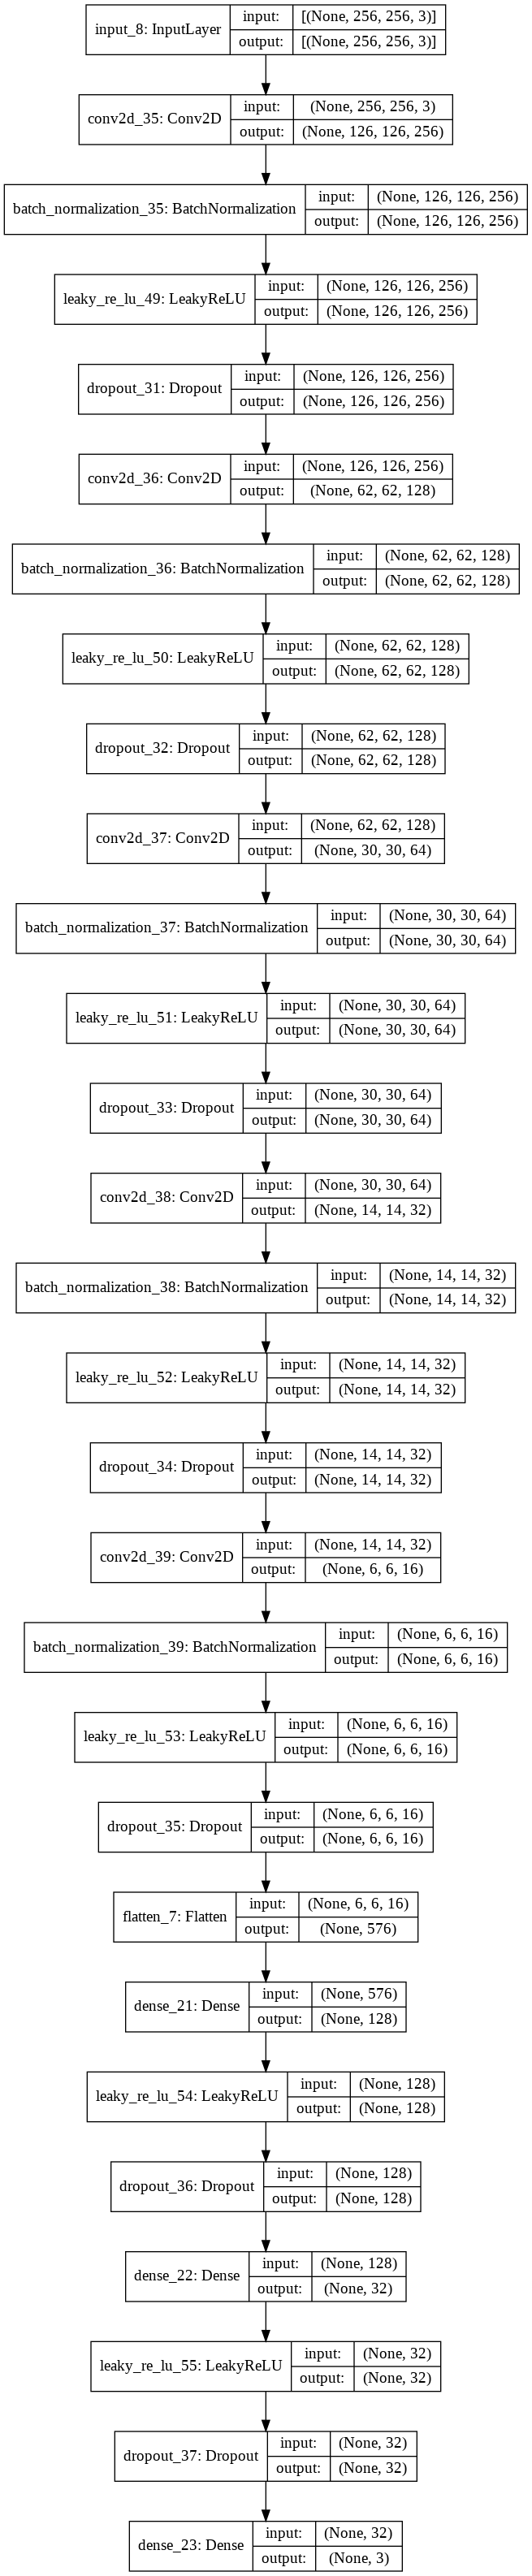

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

Compile your model here. (Hint: use model.compile() ) See [this](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) documentation or the above link to know how to do this. 

Use the following specifications:
- optimizer: Adam
- metrics: accuracy
- loss: categorical_crossentropy

In [ ]:
# Code here
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

Fit your model here. (Hint: use model.fit() ) See [this](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation or the above link again to know how to do this.

In [ ]:
# Code here
hist = model.fit(train_data_generator, epochs=epochs, steps_per_epoch=int(len(trainingImages) / batch_size), verbose=1)

Epoch 1/30
21/21 [==============================] - 649s 32s/step - loss: 1.3438 - accuracy: 0.3221
Epoch 2/30
21/21 [==============================] - 75s 3s/step - loss: 1.0416 - accuracy: 0.4329
Epoch 3/30
21/21 [==============================] - 55s 3s/step - loss: 0.9968 - accuracy: 0.4862
Epoch 4/30
21/21 [==============================] - 55s 3s/step - loss: 0.9461 - accuracy: 0.5225
Epoch 5/30
21/21 [==============================] - 55s 3s/step - loss: 0.9186 - accuracy: 0.4965
Epoch 6/30
21/21 [==============================] - 55s 3s/step - loss: 0.8288 - accuracy: 0.5990
Epoch 7/30
21/21 [==============================] - 54s 2s/step - loss: 0.7671 - accuracy: 0.6648
Epoch 8/30
21/21 [==============================] - 55s 3s/step - loss: 0.7385 - accuracy: 0.6792
Epoch 9/30
21/21 [==============================] - 54s 3s/step - loss: 0.6612 - accuracy: 0.7113
Epoch 10/30
21/21 [==============================] - 55s 3s/step - loss: 0.5982 - accuracy: 0.7581
Epoch 11/30
21/21

Plot the loss and accuracy graphs of training. Use hist.history['loss'] and hist.history['accuracy'] where hist is returned by model.fit()

No handles with labels found to put in legend.


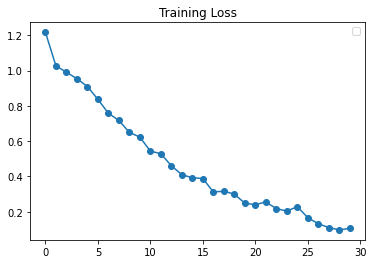

In [ ]:
# Loss Plot
loss = hist.history['loss']
plt.plot(list(range(epochs)), loss)
plt.scatter(list(range(epochs)), loss)
plt.legend()
plt.title('Training Loss')
plt.show()

No handles with labels found to put in legend.


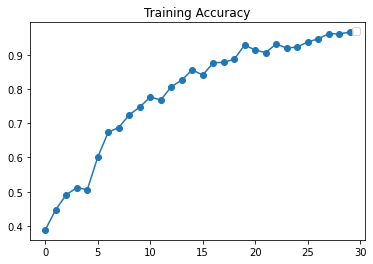

In [ ]:
# Accuracy Plot
accuracy = hist.history['accuracy']
plt.plot(list(range(epochs)), accuracy)
plt.scatter(list(range(epochs)), accuracy)
plt.legend()
plt.title('Training Accuracy')
plt.show()

### Evaluation

Now, we will evaluate our model on the test data.

First, let's read the test data using test_paths. Similar to what we did in batch_generator.

In [ ]:
# code here

def processTestData(dataset, resizeShape=(256, 256), preprocessing=None, num_classes=3):
  ytrue = []
  labels = []
  for i in range(len(dataset)):
    img = cv2.imread(dataset[i]) # Read image from the path. (Remeber cv2 reads image in BGR format.)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting to RGB
    img = cv2.resize(img, resizeShape) # Resize each image to input_shape.
    label = dataset[i].split('/')[9] # Extract label of the image from the image path using folder name. (Hint: You can do this by splitting the path.)
    
    # One-hot encode the labels.
    hotEncode = None
    if label == 'healthy_wheat':
      hotEncode = 0
    elif label == 'leaf_rust':
      hotEncode = 1
    elif label == 'stem_rust':
      hotEncode = 2
    
    ytrue.append(img)
    labels.append(hotEncode)

  # preprocess images
  if preprocessing == 'normaliztion':
    ytrue = preprocessing_norm(ytrue)
  imgArray = np.array(ytrue)
  labelArray = np.array(labels)
  labelArray = to_categorical(labelArray, num_classes)

  return imgArray, labelArray

ytrue, ytrueLabels = processTestData(testingImages, preprocessing='normaliztion')
ytrueLabels = np.argmax(ytrueLabels, axis=1)

Now, make predictions on test data. (Hint: use model.predict() ).

In [ ]:
# code here
preds = model.predict(ytrue, verbose=1)

6/6 [==============================] - 1s 193ms/step


Extract class label from predictions. (Hint: you can use np.argmax() ).

In [ ]:
# code here
preds = np.argmax(preds, axis=1)
preds

array([1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2,
       2])

Calculate and print accuracy.

In [ ]:
# code here

acc = (sum(ytrueLabels == preds) / len(testingImages)) * 100

print("Test Accuracy: ", round(acc, 2), "%")

Test Accuracy:  72.32 %


Calculate and print Confusion Matrix. Have a look [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for this.

In [ ]:
# code here
conf = confusion_matrix(ytrueLabels, preds)
conf

array([[20,  5,  4],
       [13, 47, 12],
       [ 3, 12, 61]])

In [ ]:
def plot_confusion_matrix(conf_mat):
    classes = list(labels.keys())
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    plt.show()

Use the above function to plot confusion matrix here.

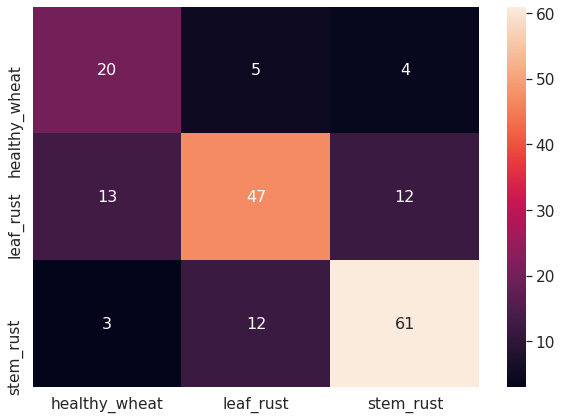

In [ ]:
# code below
plot_confusion_matrix(conf)

### Questions



What is overfitting? How are we trying to prevent overfitting here?

Answer:


In [ ]:
"""
Overfitting is when our model becomes too complex. Model has modelled the training data too well. It usually happens when the model learns the detail and the noise in the training data such that
it negatively impacts the performance of the model on new data.

We are using dropouts in order to prevent overfitting here. Dropout randomly drops neurons from the neural network during training in each iteration.
When we drop different sets of neurons, it’s equivalent to training different neural networks. The different networks will overfit in different ways, so the net effect of dropout will be to reduce overfitting.

"""

'\nOverfitting is when our model becomes too complex. Model has modelled the training data too well. It usually happens when the model learns the detail and the noise in the training data such that\nit negatively impacts the performance of the model on new data.\n\n'

What is class imbalance? How does it effect training? Does this training set have class imbalance? If yes, then show it (using numbers).

Answer:

In [ ]:
"""
Class imbalance is when distribution of examples across the known classes is biased or skewed.

It affects training such that the abundance of examples from the majority class (or classes) can swamp the minority class. Model may focus on learning the characteristics of the abundant observations only, 
neglecting the examples from the minority class that is, in fact, of more interest and whose predictions are more valuable. Hence, minority class or classes will not be modelled well and prediction accuracy will
also decrease then. 

Yes, this training set has class imbalance.

examples of healthy_wheat = 113
examples of leaf_rust = 286
examples of stem_rust = 300
Since there are disproportionate number of examples across the classes, hence this training set have class imbalance.

"""

'\nClass imbalance is when distribution of examples across the known classes is biased or skewed.\nYes, this training set has class imbalance.\nexamples of healthy_wheat = 113\nexamples of leaf_rust = 286\nexamples of stem_rust = 300\nSince there are disproportionate number of examples across the classes, hence this training set have class imbalance.\n\n'